# Matrix Decompositions: ICA, NMF, PCA

In [14]:
# Import packages

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import pandas as pd
import seaborn as sns


# import scipy.integrate as integrate
from sklearn.decomposition import PCA, FastICA, NMF
# from sklearn.neural_network import MLPClassifier
# from sklearn.preprocessing import StandardScaler
# from sklearn.cluster import KMeans
# from sklearn.metrics import accuracy_score, plot_confusion_matrix, confusion_matrix
# from sklearn.naive_bayes import GaussianNB
# from sklearn.model_selection import cross_val_score, cross_val_predict
# from sklearn.model_selection import KFold
# from sklearn.svm import SVC
# from sklearn.neighbors import KNeighborsClassifier as KNN
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
# from sklearn.model_selection import train_test_split

# import tensorly as tl
# from tensorly.decomposition import tucker,non_negative_tucker,parafac,non_negative_parafac
# from tensorly import tucker_to_tensor
# from tensorly.cp_tensor import cp_to_tensor

# from keras.models import Sequential
# from keras.layers import Dense
# from keras.wrappers.scikit_learn import KerasClassifier
# from keras.utils import np_utils

plt.rcParams.update({'font.size': 14})

In [3]:
# Import data

X=pd.read_pickle('X.pkl')

## PCA

In [11]:
# Confirm PCA parameters

print('Input matrix shape: ', X.shape)

# Change number of components as necessary

model_pca=PCA(n_components=3, 
              copy=True, 
              whiten=False, 
              svd_solver='auto', 
              tol=0.0, 
              iterated_power='auto', 
              random_state=None)

Input matrix shape:  (333900, 60)


In [12]:
# Fit PCA in the Spatial Domain

model_pca.fit(X.T)

print('Explained variance : ',model_pca.explained_variance_)
print('Explained variance ratio: ',model_pca.explained_variance_ratio_)
print('Singular values: ', model_pca.singular_values_)

X_pca=model_pca.transform(X.T)

Explained variance :  [134438.2879445   75034.7386567   51495.53517924]
Explained variance ratio:  [0.3068372  0.17125664 0.11753159]
Singular values:  [2816.35562185 2104.055508   1743.05380742]


In [13]:
#  Fit PCA in the Temporal Domain

X_temp=X.values.reshape(477,700,60).transpose(1,0,2).reshape(700, 477*60) #time

model_pca.fit(X_temp)

print('Explained variance : ',model_pca.explained_variance_)
print('Explained variance ratio: ',model_pca.explained_variance_ratio_)
print('Singular values: ', model_pca.singular_values_)

X_temp_pca=model_pca.transform(X_temp)

Explained variance :  [6418.19701651 3014.83257885 2015.93337148]
Explained variance ratio:  [0.17871866 0.08394987 0.05613491]
Singular values:  [2118.09341497 1451.67764074 1187.07094424]


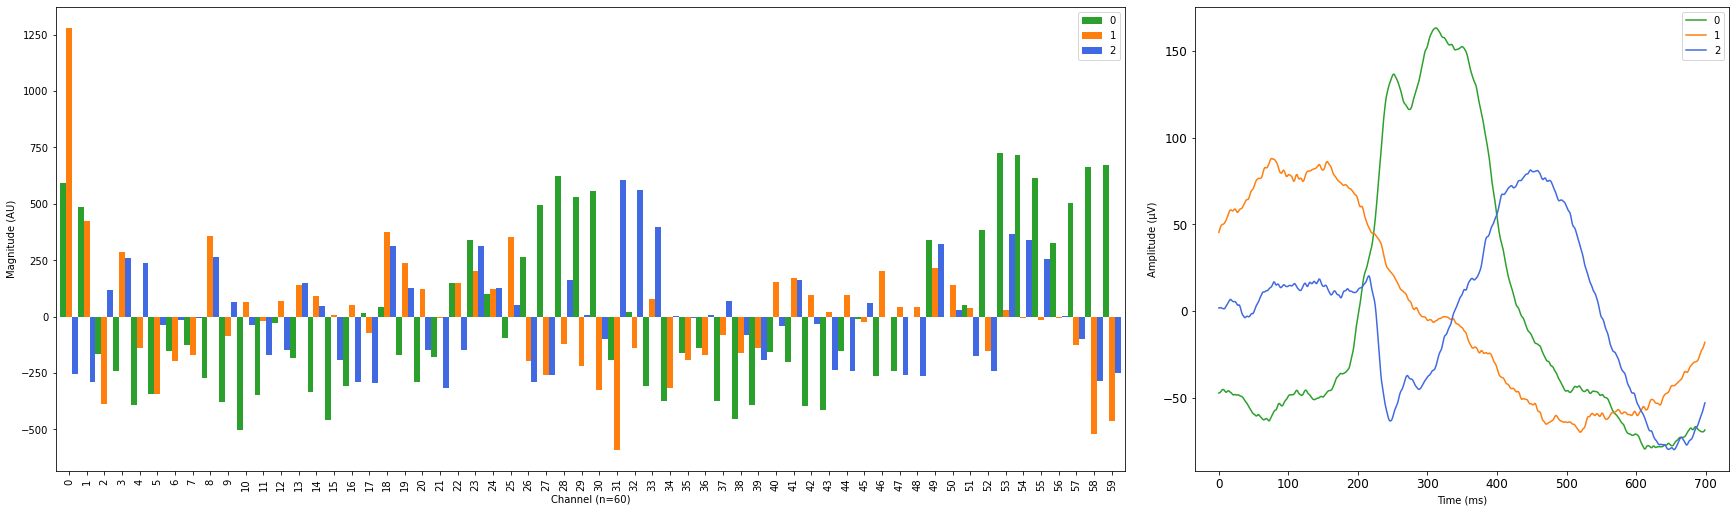

In [15]:
# Visualise the PCA components across channels & time

%matplotlib inline

pd1 = pd.DataFrame(X_pca)
pd2 = pd.DataFrame(X_temp_pca)

fig, ax = plt.subplots(1, 2, figsize=(24,7), gridspec_kw={'width_ratios': [2, 1]}, constrained_layout=True)

pd1.plot(ax=ax[0], 
         kind='bar', 
         xlabel='Channel (n=60)', 
         ylabel='Magnitude (AU)', 
         color=['tab:green', 'tab:orange', 'royalblue'], 
         width=1)

ax[0].set_xticklabels(X.columns)

pd2.plot(ax=ax[1],
         kind='line',  
         xlabel='Time (ms)', 
         ylabel='Amplitude (μV)', 
         fontsize=12, 
         color=['tab:green', 'tab:orange', 'royalblue'])

plt.show();

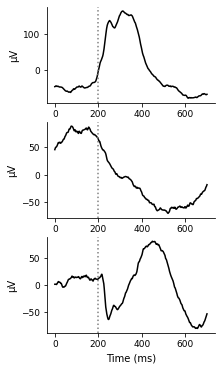

In [16]:
# Plot components individually

%matplotlib inline

fix, ax = plt.subplots(3, 1, figsize=(3,6)) 

im = pd2[0].plot(ax=ax[0],
                 kind='line',   
            ylabel='μV', 
            fontsize=9, 
            color=['black'])

im.spines['top'].set_visible(False)
im.spines['right'].set_visible(False)
im.axvline(x=200, linestyle='dotted', color='grey')

im = pd2[1].plot(ax=ax[1],
            kind='line',   
            ylabel='μV', 
            fontsize=9, 
            color=['black'])

im.spines['top'].set_visible(False)
im.spines['right'].set_visible(False)
im.axvline(x=200, linestyle='dotted', color='grey')

im = pd2[2].plot(ax=ax[2],
                 kind='line',  
            xlabel='Time (ms)', 
            ylabel='μV', 
            fontsize=9, 
            color=['black'])

im.spines['top'].set_visible(False)
im.spines['right'].set_visible(False)
im.axvline(x=200, linestyle='dotted', color='grey')

Text(-0.9997599999999984, 0.5, 'Components')

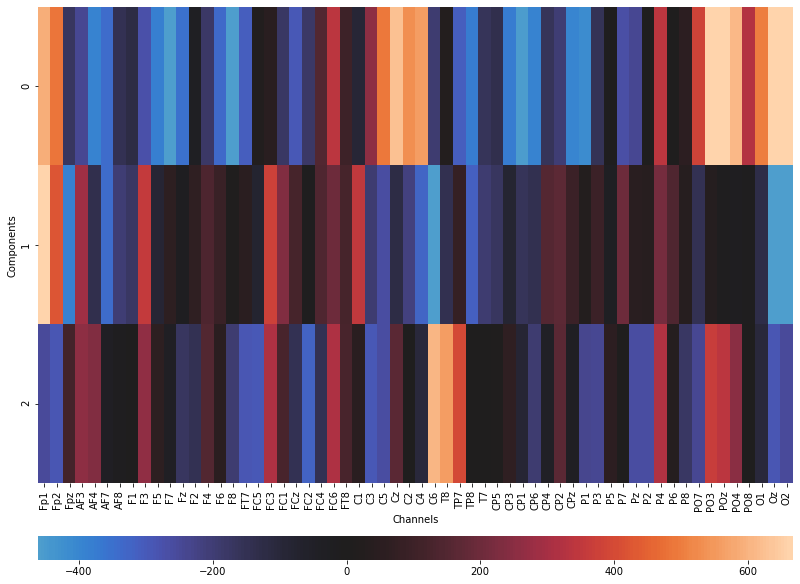

In [17]:
# Plot components as a heatmap across all channels

%matplotlib inline

ch_names = ['Fp1', 'Fp2', 'Fpz', 'AF3',  'AF4', 'AF7', 'AF8', 'F1', 'F3', 'F5', 'F7', 'Fz', 'F2', 'F4', 'F6', 'F8', 
            'FT7', 'FC5','FC3','FC1', 'FCz', 'FC2', 'FC4', 'FC6', 'FT8', 'C1', 'C3', 'C5',  'Cz', 'C2', 'C4', 'C6', 
            'T8', 'TP7', 'TP8', 'T7','CP5', 'CP3', 'CP1',  'CP6', 'CP4', 'CP2', 'CPz', 'P1', 'P3', 'P5', 'P7', 'Pz', 
            'P2', 'P4', 'P6', 'P8', 'PO7', 'PO3', 'POz', 'PO4', 'PO8', 'O1', 'Oz', 'O2']

grid_kws = {"height_ratios": (1, .05), "hspace": .3}
f, (ax, cbar_ax) = plt.subplots(2, gridspec_kw=grid_kws, figsize=(11,8), constrained_layout=True)


ax = sns.heatmap(pd1.T, 
                 ax=ax,
                 cbar_ax=cbar_ax,
                 cbar_kws={"orientation": "horizontal"}, 
                 robust=True, 
                 center=0, 
                 xticklabels=ch_names)

ax.set_xlabel('Channels')
ax.set_ylabel('Components')

## ICA

In [18]:
# ICA parameters

model_ica = FastICA(n_components=3, 
                    algorithm='parallel', 
                    whiten=True, 
                    fun='logcosh', 
                    fun_args=None, 
                    max_iter=1000, 
                    tol=0.0001, 
                    w_init=None, 
                    random_state=None)

In [19]:
# Fit the ICA in the spatial domain 

model_ica.fit(X.T)

print('Components: ',model_ica.components_)
print('Mixing values: ', model_ica.mixing_)
print('Mean values: ', model_ica.mean_)

X_ica=model_ica.transform(X.T);

Components:  [[5.19789843e-07 4.89392245e-07 2.87304022e-07 ... 1.72948270e-07
  3.28551795e-07 4.75203558e-07]
 [1.45692183e-07 1.82474838e-07 1.45387341e-07 ... 4.54758244e-07
  4.96453562e-07 5.41031669e-07]
 [1.65994429e-06 1.70417174e-06 1.40793509e-06 ... 3.88202737e-07
  3.53757134e-07 3.61901657e-07]]
Mixing values:  [[3.19486117 0.36926155 5.84780673]
 [3.04890729 0.67500135 5.97216111]
 [2.00326428 0.63777749 4.86204212]
 ...
 [0.54130043 3.23211423 1.34844813]
 [1.16989581 3.39253669 1.3249456 ]
 [1.78207459 3.57896306 1.43775386]]
Mean values:  [-1.20524101 -1.25162773 -1.16699231 ... -0.38248702 -0.44026697
 -0.46468104]


In [20]:
# Fit the ICA in the temporal domain 

X_temp=X.values.reshape(477,700,60).transpose(1,0,2).reshape(700,477*60) #time

model_ica.fit(X_temp)

print('Components: ',model_ica.components_)
print('Mixing values: ', model_ica.mixing_)
print('Mean values: ', model_ica.mean_)

X_temp_ica=model_ica.transform(X_temp)

Components:  [[-9.42919198e-06 -1.26889085e-05  3.46311242e-06 ... -1.75032460e-06
  -4.01145683e-06 -3.83841014e-06]
 [-8.87892798e-06 -5.18075491e-06  6.58355705e-06 ...  8.67875011e-06
   6.26142210e-06  6.14624369e-06]
 [-2.06789650e-06  3.73056711e-06  7.57459931e-06 ...  2.18728486e-06
   3.40948631e-06  2.60797104e-06]]
Mixing values:  [[-10.70615709 -17.05899713  -1.45175981]
 [-17.8988105   -7.94048139   9.895195  ]
 [  3.9346593    9.9906146   16.72008241]
 ...
 [-10.81150215  27.17382108  -3.30951556]
 [-12.28325983  20.43215467   1.5579286 ]
 [-12.21463766  20.70454503  -0.54147862]]
Mean values:  [-0.65311112  0.04038784  0.01130022 ...  0.53787673  0.45047438
  0.45982148]


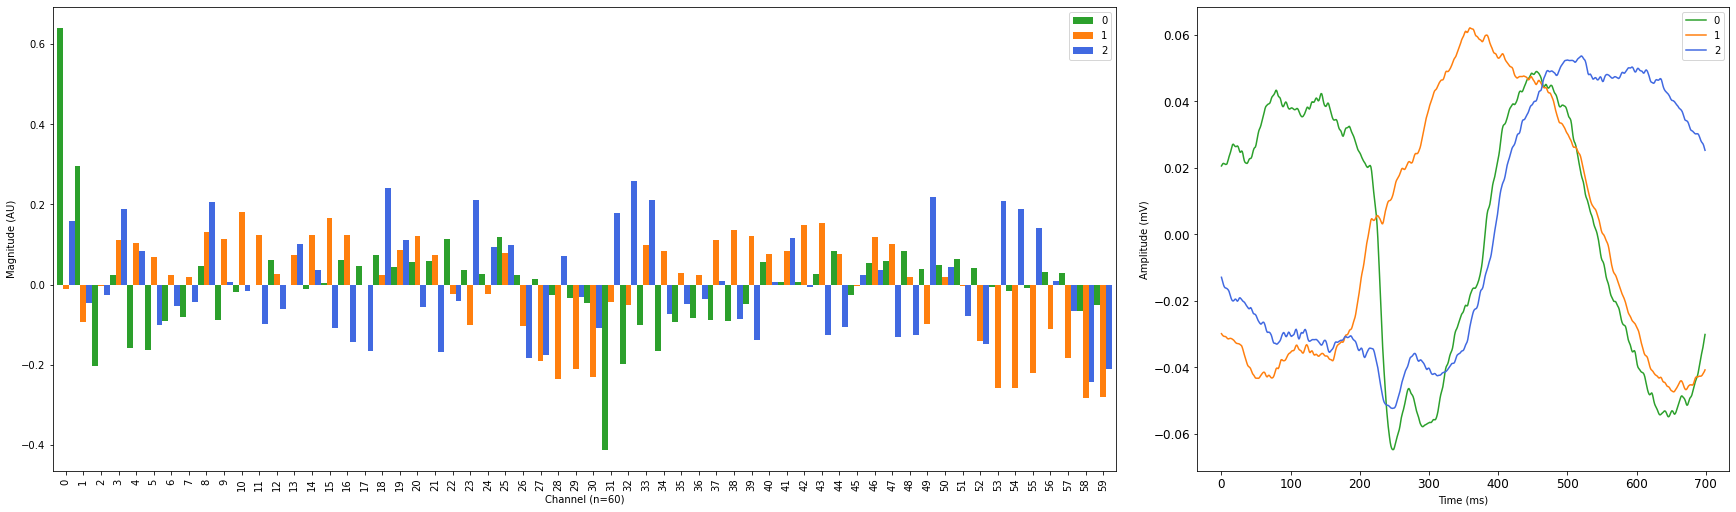

In [21]:
# Visualise the ICA outputs

pd1 = pd.DataFrame(X_ica)
pd2 = pd.DataFrame(X_temp_ica)

fig, ax = plt.subplots(1, 2, figsize=(24,7), gridspec_kw={'width_ratios': [2, 1]}, constrained_layout=True)

pd1.plot(ax=ax[0], 
         kind='bar', 
         xlabel='Channel (n=60)', 
         ylabel='Magnitude (AU)',  
         color=['tab:green', 'tab:orange', 'royalblue'], 
         width=1)
ax[0].set_xticklabels(X.columns)

pd2.plot(ax=ax[1],
         kind='line',  
         xlabel='Time (ms)', 
         ylabel='Amplitude (mV)', 
         fontsize=12, 
         color=['tab:green', 'tab:orange', 'royalblue'])

plt.show();

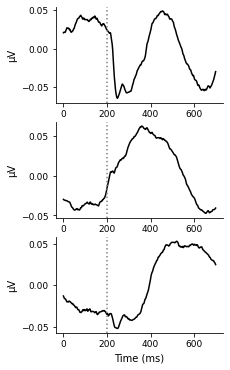

In [23]:
# Plot individual components in time

%matplotlib inline

fix, ax = plt.subplots(3, 1, figsize=(3,6)) 

im = pd2[0].plot(ax=ax[0],
                 kind='line',   
            ylabel='μV', 
            fontsize=9, 
            color=['black'])

im.spines['top'].set_visible(False)
im.spines['right'].set_visible(False)
im.axvline(x=200, linestyle='dotted', color='grey')

im = pd2[1].plot(ax=ax[1],
            kind='line',   
            ylabel='μV', 
            fontsize=9, 
            color=['black'])

im.spines['top'].set_visible(False)
im.spines['right'].set_visible(False)
im.axvline(x=200, linestyle='dotted', color='grey')

im = pd2[2].plot(ax=ax[2],
                 kind='line',  
            xlabel='Time (ms)', 
            ylabel='μV', 
            fontsize=9, 
            color=['black'])

im.spines['top'].set_visible(False)
im.spines['right'].set_visible(False)
im.axvline(x=200, linestyle='dotted', color='grey')

Text(-0.9997599999999984, 0.5, 'Components')

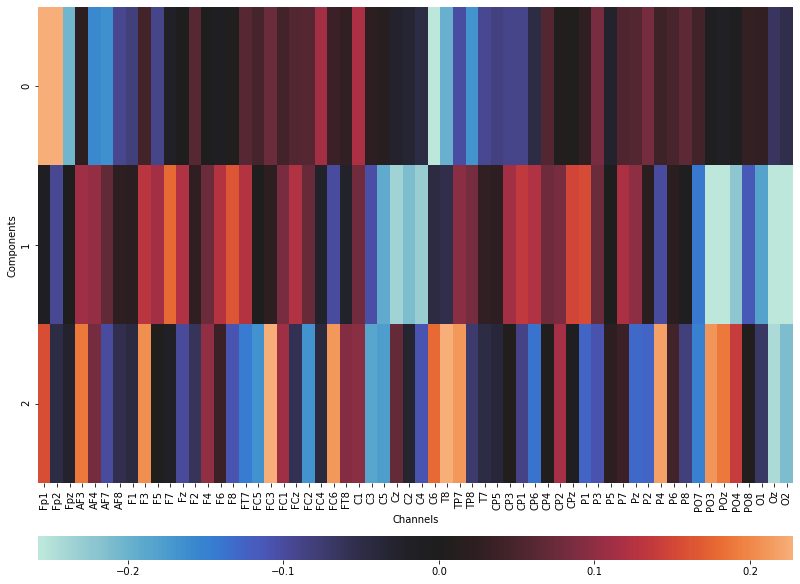

In [24]:
# Plot individual components across channels as a heatmap

%matplotlib inline

ch_names = ['Fp1', 'Fp2', 'Fpz', 'AF3',  'AF4', 'AF7', 'AF8', 'F1', 'F3', 'F5', 'F7', 'Fz', 'F2', 'F4', 'F6', 'F8', 
            'FT7', 'FC5','FC3','FC1', 'FCz', 'FC2', 'FC4', 'FC6', 'FT8', 'C1', 'C3', 'C5',  'Cz', 'C2', 'C4', 'C6', 
            'T8', 'TP7', 'TP8', 'T7','CP5', 'CP3', 'CP1',  'CP6', 'CP4', 'CP2', 'CPz', 'P1', 'P3', 'P5', 'P7', 'Pz', 
            'P2', 'P4', 'P6', 'P8', 'PO7', 'PO3', 'POz', 'PO4', 'PO8', 'O1', 'Oz', 'O2']

grid_kws = {"height_ratios": (1, .05), "hspace": .3}
f, (ax, cbar_ax) = plt.subplots(2, gridspec_kw=grid_kws, figsize=(11,8), constrained_layout=True)


ax = sns.heatmap(pd1.T, 
                 ax=ax,
                 cbar_ax=cbar_ax,
                 cbar_kws={"orientation": "horizontal"}, 
                 robust=True, 
                 center=0, 
                 xticklabels=ch_names)

ax.set_xlabel('Channels')
ax.set_ylabel('Components')

### NMF

In [25]:
# Define NMF parameters

model_NMF=NMF(n_components=3,
              solver='cd',
              beta_loss='frobenius',
              tol=0.0001,
              max_iter=800,
              random_state=None,
              alpha=0.0,
              l1_ratio=0.0,
              verbose=0,
              shuffle=False)

In [27]:
# Fit NMF

W_spat = model_NMF.fit_transform(abs(X).T)
H_spat = model_NMF.components_

X_temp = X.values.reshape(477,700,60).transpose(1,0,2).reshape(700,477*60)

W_temp = model_NMF.fit_transform(abs(X_temp))
H_temp = model_NMF.components_

print('Timepoint specific activation coefficient in the spatial domain :', H_spat)
print('Timepoint specific activation coefficient in the temporal domain:', H_temp)

/Users/anastasiakuzmich/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "
/Users/anastasiakuzmich/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


Timepoint specific activation coefficient in the spatial domain : [[0.16696312 0.17090078 0.15262389 ... 0.02989951 0.04775159 0.05488505]
 [0.11775199 0.11352501 0.09325069 ... 0.07818508 0.08039704 0.08143187]
 [0.00093582 0.00233811 0.0137212  ... 0.01794932 0.01984804 0.02379858]]
Timepoint specific activation coefficient in the temporal domain: [[1.05918572 0.69856726 0.43967619 ... 0.25472518 0.28790986 0.25996769]
 [0.38568447 0.18873373 0.09664365 ... 0.36795927 0.23039451 0.24827865]
 [0.3953164  0.41925993 0.28636633 ... 0.27697457 0.36014403 0.35476888]]


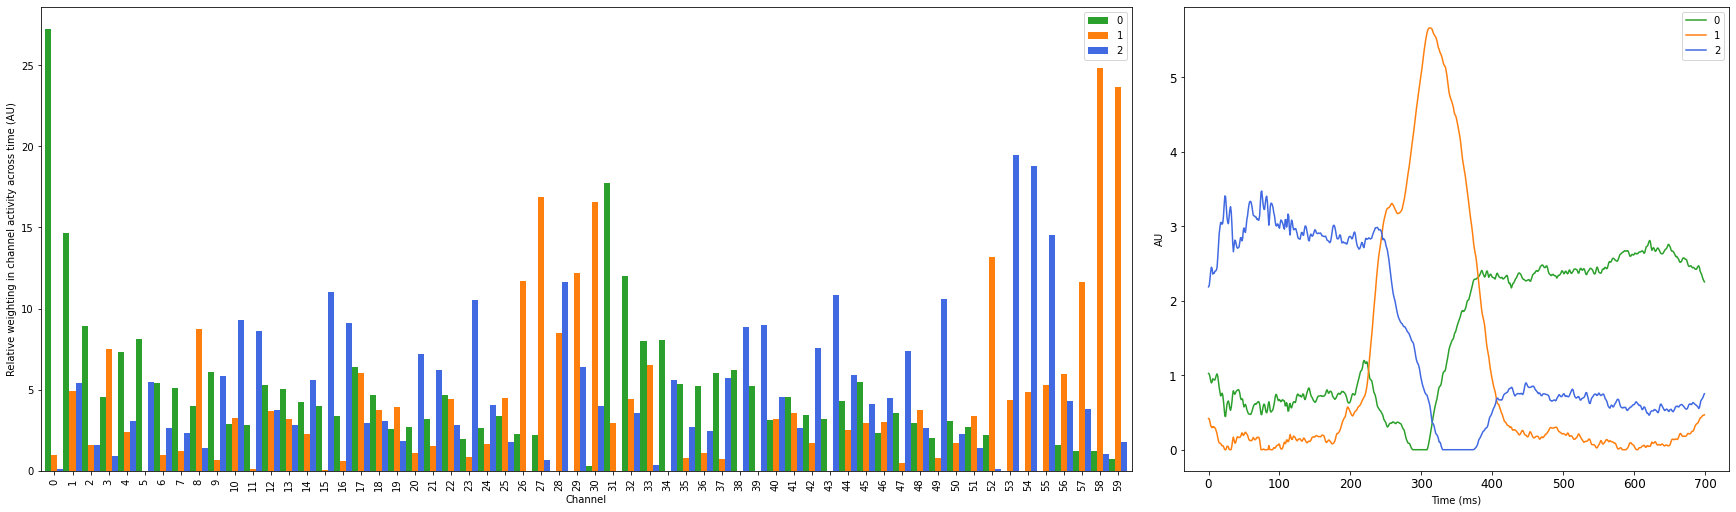

In [29]:
# Visualise the components

pd1 = pd.DataFrame(W_spat)
pd2 = pd.DataFrame(W_temp)

%matplotlib inline

fig, ax = plt.subplots(1, 2, figsize=(24,7), gridspec_kw={'width_ratios': [2, 1]}, constrained_layout=True)

pd1.plot(ax=ax[0], 
         kind='bar', 
         xlabel='Channel', 
         ylabel='Relative weighting in channel activity across time (AU)', 
         color=['tab:green', 'tab:orange', 'royalblue'], 
         width=1, 
        legend='topright')
ax[0].set_xticklabels(X.columns)

pd2.plot(ax=ax[1],
         kind='line',  
         xlabel='Time (ms)', 
         ylabel='AU', 
         fontsize=12, 
         color=['tab:green', 'tab:orange', 'royalblue'])

plt.show();

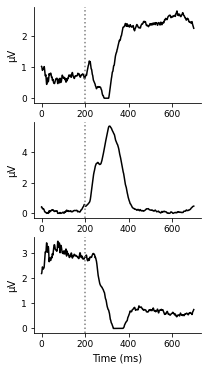

In [30]:
# Plot temporal traces individually

%matplotlib inline

fix, ax = plt.subplots(3, 1, figsize=(3,6)) 

im = pd2[0].plot(ax=ax[0],
                 kind='line',   
            ylabel='μV', 
            fontsize=9, 
            color=['black'])

im.spines['top'].set_visible(False)
im.spines['right'].set_visible(False)
im.axvline(x=200, linestyle='dotted', color='grey')

im = pd2[1].plot(ax=ax[1],
            kind='line',   
            ylabel='μV', 
            fontsize=9, 
            color=['black'])

im.spines['top'].set_visible(False)
im.spines['right'].set_visible(False)
im.axvline(x=200, linestyle='dotted', color='grey')

im = pd2[2].plot(ax=ax[2],
                 kind='line',  
            xlabel='Time (ms)', 
            ylabel='μV', 
            fontsize=9, 
            color=['black'])

im.spines['top'].set_visible(False)
im.spines['right'].set_visible(False)
im.axvline(x=200, linestyle='dotted', color='grey')

Text(-0.9997599999999984, 0.5, 'Components')

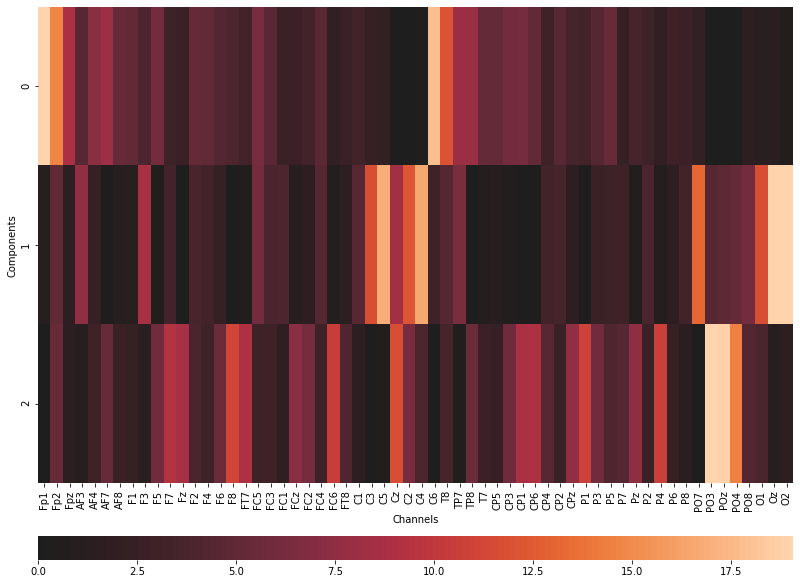

In [31]:
# Plot the components across channels 

%matplotlib inline

ch_names = ['Fp1', 'Fp2', 'Fpz', 'AF3',  'AF4', 'AF7', 'AF8', 'F1', 'F3', 'F5', 'F7', 'Fz', 'F2', 'F4', 'F6', 'F8', 
            'FT7', 'FC5','FC3','FC1', 'FCz', 'FC2', 'FC4', 'FC6', 'FT8', 'C1', 'C3', 'C5',  'Cz', 'C2', 'C4', 'C6', 
            'T8', 'TP7', 'TP8', 'T7','CP5', 'CP3', 'CP1',  'CP6', 'CP4', 'CP2', 'CPz', 'P1', 'P3', 'P5', 'P7', 'Pz', 
            'P2', 'P4', 'P6', 'P8', 'PO7', 'PO3', 'POz', 'PO4', 'PO8', 'O1', 'Oz', 'O2']

grid_kws = {"height_ratios": (1, .05), "hspace": .3}
f, (ax, cbar_ax) = plt.subplots(2, gridspec_kw=grid_kws, figsize=(11,8), constrained_layout=True)


ax = sns.heatmap(pd1.T, 
                 ax=ax,
                 cbar_ax=cbar_ax,
                 cbar_kws={"orientation": "horizontal"}, 
                 robust=True, 
                 center=0, 
                 xticklabels=ch_names)

ax.set_xlabel('Channels')
ax.set_ylabel('Components')